# 次の実験条件を機械学習モデルに提案させます
- Gaussianprocessを使います

In [1]:
#ライブラリの読み込み
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#データ読み込み
df=pd.read_csv("organic synthesis.csv")
df

,Solvent,MW,tPSA,MP,BP,Density,Vdensity,Vpressure,LogP,Viscosity,Hvapor,Tension,IP,Epsilon,HOMO,LUMO,DeltaH-L,Dipole,Yield
0,Et2O,74.1,9.2,-116,35,0.71,2.60,538.0,0.89,0.24,27.85,17.1,9.53,4.3,-0.371,0.192,0.563,1.08,56
1,acetone,58.1,17.1,-94,56,0.79,2.00,231.0,-0.24,0.32,30.99,23.7,9.69,20.7,-0.369,0.103,0.472,2.94,53
2,MeCN,41.1,23.8,-44,82,0.79,1.42,88.8,-0.34,0.35,33.22,29.0,12.20,37.5,-0.456,0.151,0.607,3.89,48
3,DMF,73.1,20.3,-61,153,0.95,2.51,3.9,-1.01,0.80,47.60,36.4,9.12,36.7,-0.356,0.143,0.500,3.88,45
4,EtOH,46.1,20.2,-114,78,0.79,1.59,59.3,-0.31,1.07,42.32,22.0,10.47,24.6,-0.390,0.178,0.568,1.60,33
5,THF,72.1,9.2,-109,66,0.89,2.50,162.0,0.46,0.53,29.60,26.4,9.45,7.6,-0.361,0.185,0.545,1.85,21
6,MeNO2,61.0,45.8,-29,101,1.14,2.11,35.8,-0.35,0.61,38.30,37.2,11.08,35.9,-0.427,0.045,0.472,3.66,20
7,Toluene,92.1,0.0,-95,111,0.87,3.14,28.4,2.73,0.56,38.01,27.7,8.82,2.4,-0.341,0.100,0.441,0.34,18
8,DCM,84.9,0.0,-97,40,1.32,2.93,435.0,1.25,0.44,28.82,28.2,11.32,9.1,-0.431,0.105,0.536,1.89,12
9,chlorobenzene,112.6,0.0,-45,132,1.11,3.88,12.0,2.84,0.81,40.97,33.5,9.07,5.6,-0.352,0.082,0.434,1.95,7


In [3]:
#使うカラムを指定する
df=df.drop("Solvent",axis=1)

In [95]:
#欠損(NaN)が含まれるレコードを消す 
df=df.dropna()

#x,yの設定

#Xには説明変数を設定する
X=df[["Vdensity","MW","Viscosity","MP"]]

#Yには目的変数を設定する
Y=df[["Yield"]]

X

,Vdensity,MW,Viscosity,MP
0,2.60,74.1,0.24,-116
1,2.00,58.1,0.32,-94
2,1.42,41.1,0.35,-44
3,2.51,73.1,0.80,-61
4,1.59,46.1,1.07,-114
5,2.50,72.1,0.53,-109
6,2.11,61.0,0.61,-29
7,3.14,92.1,0.56,-95
8,2.93,84.9,0.44,-97
9,3.88,112.6,0.81,-45


# X,Yを正規化します
- 殆どの回帰モデル(除 Random forest系)は、X,Yを正規化した方が正しく回帰出来ます
- 正規化: 平均が0、標準偏差が1になるように変換すること 
- 今回はX、Yをそれぞれsc_X、sc_Yに正規化して代入します

In [9]:
#StandardScalerを使えば一発正規化できます
from sklearn.preprocessing import StandardScaler

#X
X_scaler=StandardScaler()
sc_X=X_scaler.fit_transform(X)

#Y
Y_scaler=StandardScaler()
sc_Y=Y_scaler.fit_transform(Y)


# GaussianProcessで回帰します
- ハイパーパラメータは結構複雑なので割愛します

In [14]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process import kernels as sk_kern

kernel = sk_kern.RBF(1.0, (1e-3, 1e3)) + sk_kern.ConstantKernel(1.0, (1e-3, 1e3)) + sk_kern.WhiteKernel()

model= GaussianProcessRegressor(
    kernel=kernel,
    alpha=1e-10, 
    optimizer="fmin_l_bfgs_b", 
    n_restarts_optimizer=20)


model.fit(sc_X,sc_Y)


GaussianProcessRegressor(kernel=RBF(length_scale=1) + 1**2 + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=20)

In [48]:
#この処理は繰り返し使うので、関数として定義
def auto_predict(sc_X,plot=False):
    #信頼区間の計算
    pred_y,std_y=model.predict(sc_X,return_std=True)
    std_y=std_y.reshape(-1,1)


    #信頼区間付きの予測値を計算します
    pred_max=Y_scaler.inverse_transform(pred_y+std_y)
    pred_mean=Y_scaler.inverse_transform(pred_y)
    pred_min=Y_scaler.inverse_transform(pred_y-std_y)


    #dataframeで表示
    pred_df=pd.DataFrame([Y.values.reshape(-1),
                          pred_min.reshape(-1),
                         pred_mean.reshape(-1),
                         pred_max.reshape(-1)]).T
    pred_df.columns=["Experimental","pred-sigma","pred","pred+sigma"]

    if plot:
        #可視化
        plt.figure(figsize=(10,10))
        plt.errorbar(Y.values.reshape(-1), pred_mean.reshape(-1), 
                     yerr = ((pred_max-pred_min)/2).reshape(-1),
                     capsize=5, fmt='o', markersize=10, ecolor='black', markeredgecolor = "black", color='w')
    return pred_df

,Experimental,pred-sigma,pred,pred+sigma
0,56.0,18.345309,32.083119,45.820930
1,53.0,28.778284,42.828532,56.878780
2,48.0,19.306845,34.048951,48.791056
3,45.0,11.730496,25.480690,39.230884
4,33.0,10.729575,25.467304,40.205032
5,21.0,20.207120,33.655973,47.104826
6,20.0,13.683564,27.937486,42.191409
7,18.0,-4.863854,8.239595,21.343044
8,12.0,3.648848,16.508617,29.368385
9,7.0,-11.059058,2.324049,15.707156


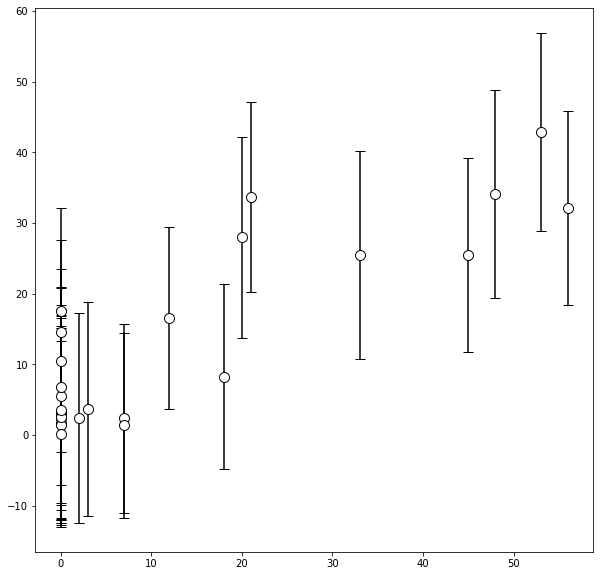

In [49]:
auto_predict(sc_X,plot=True)

# 次に検討すべき実験条件を考えてみます
- 今回はランダムに条件を考えます
- その中で、収率が高そうなもの、 予測の不確定性が高いものを優先的に実験していくと良いはずです

In [90]:
from numpy.random import *

#試す条件数
N=10000

#ランダムに実験条件を設定します

#密度:
density=randint(1,150,size=(N))/100

#分子量
MW=randint(1,400,size=(N))

#粘度
viscosity=randint(1,1000,size=(N))/500

#融点
MP=randint(-100,1000,size=(N))

screen_df=pd.DataFrame([density,MW,viscosity,MP]).T
screen_df.columns=X.columns

screen_df[:6]

,Vdensity,MW,Viscosity,MP
0,0.98,73.0,0.556,998.0
1,0.18,311.0,1.256,554.0
2,0.91,11.0,0.648,169.0
3,1.02,1.0,0.116,-81.0
4,1.38,82.0,0.622,70.0
5,1.20,217.0,0.746,-12.0


In [93]:
#予測してみます
pred_df=auto_predict(X_scaler.transform(screen_df)).drop("Experimental",axis=1)
result_df=pd.concat([screen_df,pred_df],axis=1)
result_df["sigma"]=(result_df["pred+sigma"]-result_df["pred-sigma"])/2

#予測値が大きい順にソート
result_df.sort_values(by="pred",ascending=False)[:5]

,Vdensity,MW,Viscosity,MP,pred-sigma,pred,pred+sigma,sigma
9040,1.47,57.0,0.376,-93.0,22.491064,37.416422,52.341781,14.925359
4433,1.37,58.0,0.596,-55.0,20.440986,35.892319,51.343652,15.451333
4767,1.28,55.0,0.156,-63.0,19.655994,35.538524,51.421055,15.882531
4579,1.41,52.0,0.762,-50.0,18.611808,34.041665,49.471521,15.429857
1889,1.49,68.0,0.872,-94.0,17.568305,33.893648,50.218990,16.325342


In [94]:
#sigmaが大きい順
result_df.sort_values(by="sigma",ascending=False)[:5]

,Vdensity,MW,Viscosity,MP,pred-sigma,pred,pred+sigma,sigma
0,0.98,73.0,0.556,998.0,-9.961093,11.589452,33.139996,21.550545
5772,0.10,323.0,0.736,499.0,-9.961093,11.589452,33.139996,21.550545
5821,0.26,176.0,1.022,774.0,-9.961093,11.589452,33.139996,21.550545
5816,1.07,86.0,1.096,692.0,-9.961093,11.589452,33.139996,21.550545
5814,0.94,331.0,0.032,283.0,-9.961093,11.589452,33.139996,21.550545
